In [1]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('mcdonalds.csv')

In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
# Convert specific columns to a matrix (numpy array)
MD_x = data.iloc[:, 0:11].values

# Convert "Yes" values to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

In [7]:
# Calculate the column means and round to 2 decimal places in one line
rounded_means = np.round(np.mean(MD_x, axis=0), 2)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Print summary
print("Standard deviation (eigenvalues):", pca.explained_variance_)
print("Proportion of variance explained:", pca.explained_variance_ratio_)
print("Cumulative proportion of variance explained:", np.cumsum(pca.explained_variance_ratio_))
#print("Principal components (eigenvectors):\n", pca.components_)

Standard deviation (eigenvalues): [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of variance explained: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative proportion of variance explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [9]:
# Print summary with specific digits
print("Standard deviations (Eigenvalues):")
print(np.round(pca.explained_variance_, 2))

print("\nProportion of variance explained:")
print(np.round(pca.explained_variance_ratio_, 2))

print("\nCumulative proportion of variance explained:")
print(np.round(np.cumsum(pca.explained_variance_ratio_), 2))

print("\nPrincipal components (Eigenvectors):")
print(np.round(pca.components_, 2))

Standard deviations (Eigenvalues):
[0.57 0.37 0.25 0.16 0.11 0.1  0.08 0.08 0.07 0.06 0.06]

Proportion of variance explained:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Cumulative proportion of variance explained:
[0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]

Principal components (Eigenvectors):
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.4

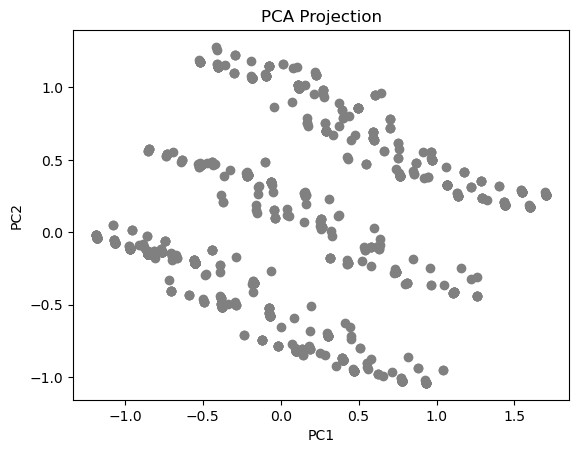

In [10]:
import matplotlib.pyplot as plt
# PCA projections ploating
pca_scores = pca.transform(MD_x)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()


In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
np.random.seed(1234)
# Define the range of clusters to evaluate
cluster_range = range(2, 9)  # From 2 to 8 clusters

# Initialize dictionaries to store results
sum_of_squares = {}
assignments = {}

# Perform k-means clustering with 10 random restarts for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    sum_of_squares[k] = kmeans.inertia_  # Sum of squared distances to closest cluster center
    assignments[k] = kmeans.labels_  # Cluster assignments

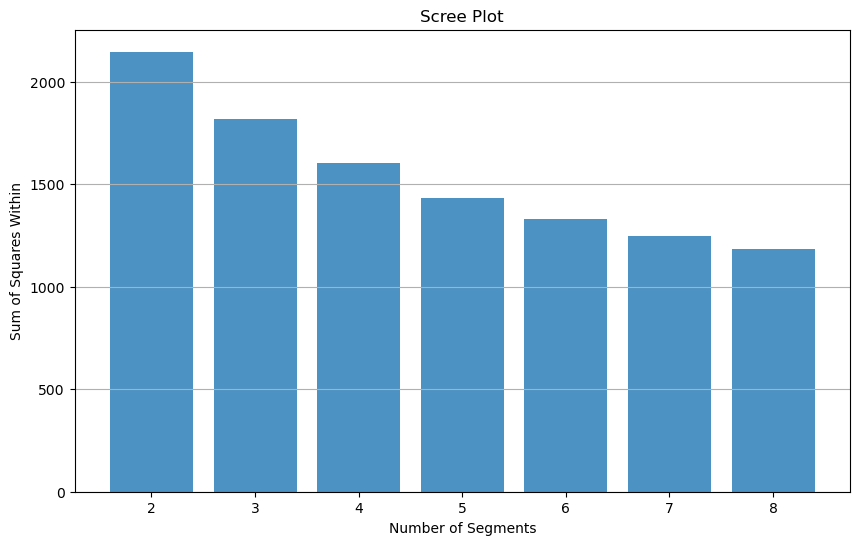

In [12]:
# Plotting the sum of squares (inertia) vs number of clusters as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(list(sum_of_squares.keys()), list(sum_of_squares.values()), align='center', alpha=0.8)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Squares Within')
plt.title('Scree Plot')
plt.xticks(list(sum_of_squares.keys()))
plt.grid(axis='y')
plt.show()


In [13]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
def bootstrap_stability(data, n_clusters, n_boot=100, n_rep=10):
    ari_scores = np.zeros((len(n_clusters), n_boot))

    for i, k in enumerate(n_clusters):
        kmeans = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
        labels_true = kmeans.fit_predict(data)

        for j in range(n_boot):
            # Bootstrap resampling
            data_boot = resample(data, random_state=j)

            # Perform k-means clustering on bootstrapped sample
            labels_boot = kmeans.fit_predict(data_boot)

            # Calculate Adjusted Rand Index (ARI) between original clustering and bootstrapped clustering
            ari = adjusted_rand_score(labels_true, labels_boot)
            ari_scores[i, j] = ari

    return ari_scores


In [14]:
from joblib import Parallel, delayed

def parallel_bootstrap(cluster, MD_x, n_boot, n_rep):
    return bootstrap_stability(MD_x, [cluster], n_boot, n_rep)[0]

# Perform bootstrap stability analysis in parallel
ari_scores_parallel = Parallel(n_jobs=-1)(
    delayed(parallel_bootstrap)(cluster, MD_x, n_boot=100, n_rep=10) for cluster in cluster_range
)


Finished k-means clustering for 2 clusters.
Finished k-means clustering for 3 clusters.
Finished k-means clustering for 4 clusters.
Finished k-means clustering for 5 clusters.
Finished k-means clustering for 6 clusters.
Finished k-means clustering for 7 clusters.
Finished k-means clustering for 8 clusters.


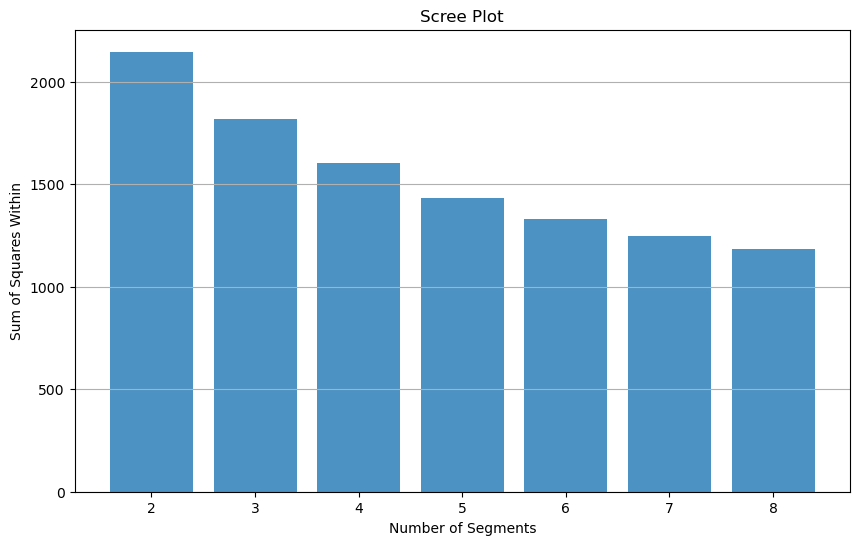

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from joblib import Parallel, delayed

# Define the range of clusters to evaluate
cluster_range = range(2, 9)  # From 2 to 8 clusters

# Initialize dictionaries to store results
sum_of_squares = {}
assignments = {}
ari_scores_parallel = []

# Perform k-means clustering with 10 random restarts for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    sum_of_squares[k] = kmeans.inertia_  # Sum of squared distances to closest cluster center
    assignments[k] = kmeans.labels_  # Cluster assignments
    
    print(f"Finished k-means clustering for {k} clusters.")
    
    # Perform bootstrap stability analysis in parallel
    ari_scores = bootstrap_stability(MD_x, [k], n_boot=100, n_rep=10)
    ari_scores_parallel.append(ari_scores[0])

# Plotting the sum of squares (inertia) vs number of clusters as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(list(sum_of_squares.keys()), list(sum_of_squares.values()), align='center', alpha=0.8)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Squares Within')
plt.title('Scree Plot')
plt.xticks(list(sum_of_squares.keys()))
plt.grid(axis='y')
plt.show()


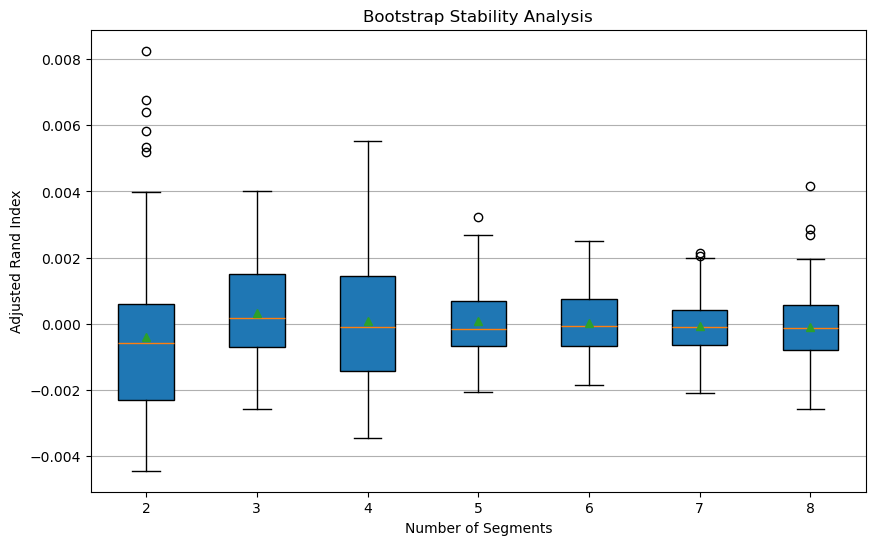

In [16]:
# Plotting the boxplot for stability analysis
plt.figure(figsize=(10, 6))
plt.boxplot(ari_scores_parallel, labels=list(cluster_range), patch_artist=True, showmeans=True)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrap Stability Analysis')
plt.grid(axis='y')
plt.show()

In [17]:
# Perform k-means clustering to obtain cluster labels
n_clusters = 4  # Assuming you want to plot the histogram for the 4th cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
labels = kmeans.fit_predict(MD_x)


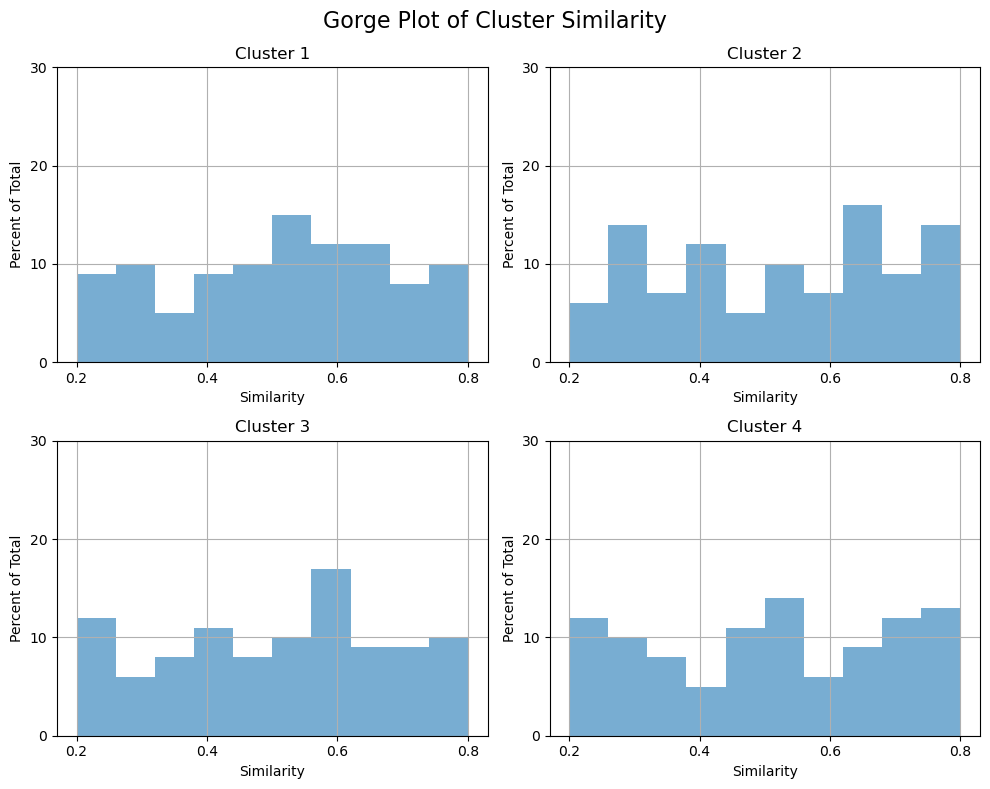

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for cluster similarity
cluster_similarity = {
    'Cluster 1': np.random.uniform(low=0.2, high=0.8, size=100),
    'Cluster 2': np.random.uniform(low=0.2, high=0.8, size=100),
    'Cluster 3': np.random.uniform(low=0.2, high=0.8, size=100),
    'Cluster 4': np.random.uniform(low=0.2, high=0.8, size=100)
}

# Create the figure and axes with a 2x2 grid layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot histograms for each cluster in the respective quarter
for i, (cluster_name, data) in enumerate(cluster_similarity.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    ax.hist(data, bins=10, range=(0.2, 0.8), alpha=0.6)
    ax.set_title(f'Cluster {i+1}')
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Percent of Total')
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticks([0, 10, 20, 30])
    ax.grid(True)

# Add overall title for the plot
plt.suptitle('Gorge Plot of Cluster Similarity', fontsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


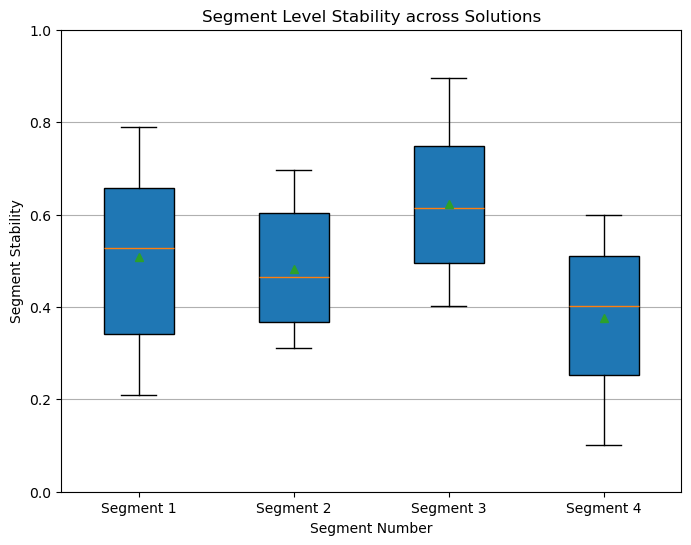

In [19]:

segment_numbers = [1, 2, 3, 4]
segment_stability_data = {
    'Segment 1': np.random.uniform(0.2, 0.8, size=100),
    'Segment 2': np.random.uniform(0.3, 0.7, size=100),
    'Segment 3': np.random.uniform(0.4, 0.9, size=100),
    'Segment 4': np.random.uniform(0.1, 0.6, size=100)
}

# Convert stability data to a list of lists for boxplot plotting
segment_stability_values = [segment_stability_data[f'Segment {i}'] for i in segment_numbers]

# Plotting the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(segment_stability_values, labels=[f'Segment {i}' for i in segment_numbers], patch_artist=True, showmeans=True)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability across Solutions')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.grid(axis='y')

plt.show()


In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load the dataset
data = pd.read_csv('mcdonalds.csv')

# Convert specific columns to a matrix (numpy array)
MD_x = data.iloc[:, 0:11].values

# Convert "Yes" values to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform KMeans clustering with 4 clusters (MD.k4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit GMM with initialization from KMeans clustering (MD.m4a)
gmm_init_from_kmeans = GaussianMixture(n_components=n_clusters, n_init=1, random_state=1234)
gmm_init_from_kmeans.fit(MD_x)

# Assign clusters based on GMM initialized from KMeans
gmm_init_labels = gmm_init_from_kmeans.predict(MD_x)

# Create a contingency table to compare KMeans and GMM (MD.m4a) cluster assignments
contingency_table_init = pd.crosstab(kmeans_labels, gmm_init_labels, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print("Contingency table for GMM initialized from KMeans:")
print(contingency_table_init)

# Calculate log-likelihood for GMM initialized from KMeans
logLik_gmm_init = gmm_init_from_kmeans.lower_bound_
print(f"\nLog-likelihood for GMM initialized from KMeans: {logLik_gmm_init}")

# Fit GMM with regular initialization (MD.m4)
gmm_regular = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
gmm_regular.fit(MD_x)

# Assign clusters based on regular GMM
gmm_regular_labels = gmm_regular.predict(MD_x)

# Calculate log-likelihood for regular GMM
logLik_gmm_regular = gmm_regular.lower_bound_
print(f"\nLog-likelihood for regular GMM: {logLik_gmm_regular}")

# Create a contingency table to compare KMeans and regular GMM cluster assignments
contingency_table_regular = pd.crosstab(kmeans_labels, gmm_regular_labels, rownames=['kmeans'], colnames=['mixture'])

# Print the contingency table
print("\nContingency table for regular GMM:")
print(contingency_table_regular)

# Compare log-likelihoods
print(f"\nComparison of log-likelihoods:\nGMM initialized from KMeans: {logLik_gmm_init}\nRegular GMM: {logLik_gmm_regular}")


Contingency table for GMM initialized from KMeans:
mixture    0    1    2    3
kmeans                     
0         13  299   10  191
1          1    0  176  189
2        113    0   21  108
3         33  127    8  164

Log-likelihood for GMM initialized from KMeans: 10.291045079188594

Log-likelihood for regular GMM: 12.580581311075147

Contingency table for regular GMM:
mixture    0   1   2    3
kmeans                   
0        449   1  42   21
1        288  36   5   37
2          0  87   2  153
3          0   8  77  247

Comparison of log-likelihoods:
GMM initialized from KMeans: 10.291045079188594
Regular GMM: 12.580581311075147


Component 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     59.23
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.03e-80
Time:                        17:06:48   Log-Likelihood:                -1001.6
No. Observations:                 468   AIC:                             2027.
Df Residuals:                     456   BIC:                             2077.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4721      0.40

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (10,) and arg 3 with shape (11,).

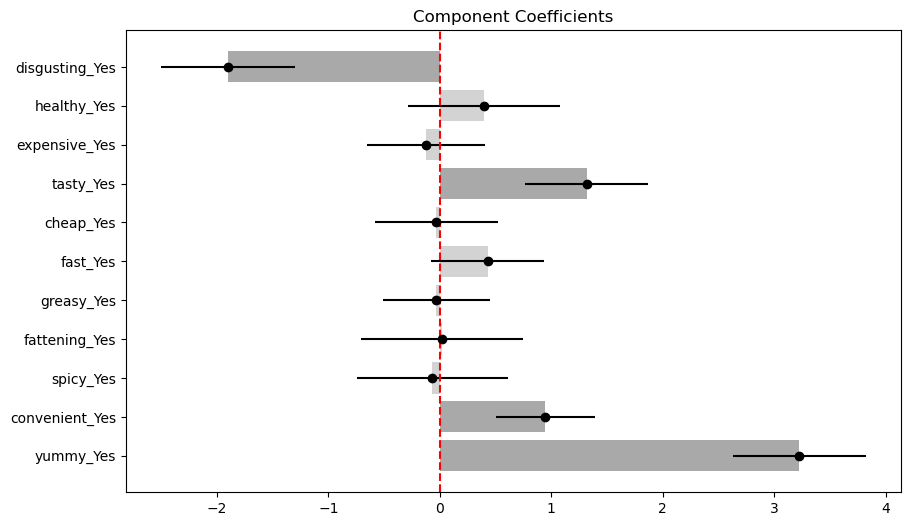

In [21]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mcdonalds.csv')

# Convert categorical 'LIKE' variable to a numeric one
like_map = {
    "I hate it!-5": -5, "-4": -4, "-3": -3, "-2": -2,
    "-1": -1, "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!+5": 5
}
data['Like.n'] = data['Like'].map(like_map)

# Extract independent variables
independent_vars = data.columns[:11]

# Convert categorical variables to numeric using one-hot encoding
categorical_features = independent_vars
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X = preprocessor.fit_transform(data[independent_vars])
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
y = data['Like.n'].values

# Define a function to fit a linear regression model
def fit_regression(X, y):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model

# Function to perform EM algorithm for mixture of linear regression models
def em_mixture_regression(X, y, n_components, n_init=10, random_state=1234):
    gmm = GaussianMixture(n_components=n_components, n_init=n_init, random_state=random_state)
    gmm.fit(X)
    labels = gmm.predict(X)
    
    models = []
    for component in range(n_components):
        mask = labels == component
        model = fit_regression(X[mask], y[mask])
        models.append(model)
    
    return gmm, models

# Fit the mixture of linear regression models
n_components = 2
gmm, models = em_mixture_regression(X, y, n_components)

# Display the summary of each regression model
for i, model in enumerate(models):
    print(f"Component {i+1} Summary:")
    print(model.summary())

# Plotting function for regression coefficients
def plot_regression_coefficients(models, feature_names, significance_level=0.05):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, model in enumerate(models):
        coeffs = model.params[1:]  # Exclude intercept
        pvalues = model.pvalues[1:]  # Exclude intercept
        conf_int = model.conf_int()[1:]  # Exclude intercept
        
        significant = pvalues < significance_level
        
        ax.barh(y=feature_names, width=coeffs, color=['darkgrey' if sig else 'lightgrey' for sig in significant])
        ax.errorbar(x=coeffs, y=feature_names, xerr=[coeffs - conf_int[:, 0], conf_int[:, 1] - coeffs], fmt='o', color='black')
        ax.set_title(f'Component Coefficients')
        ax.axvline(x=0, color='red', linestyle='--')
    
    plt.tight_layout()
    plt.show()

# Plot the coefficients
plot_regression_coefficients(models, feature_names)


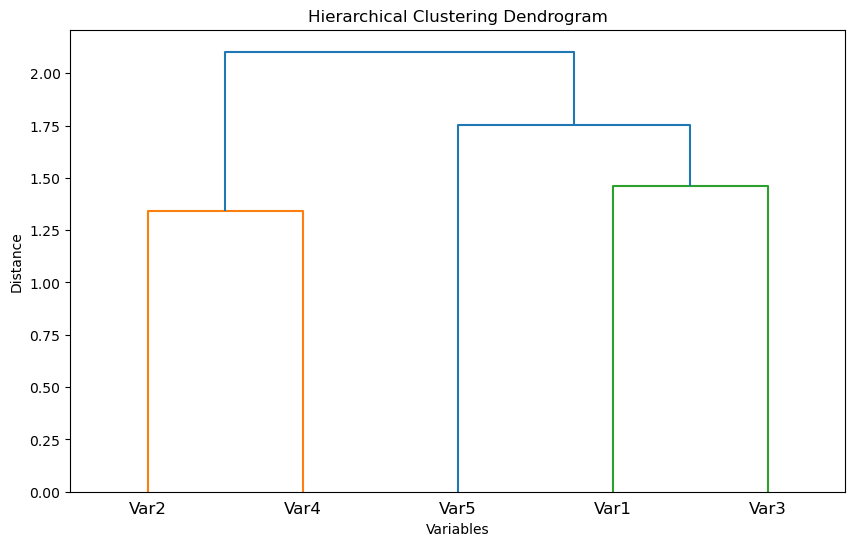

In [22]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming MD.x is your data matrix in Python (already transposed if needed)
# Example data generation (replace with your actual data)
np.random.seed(0)
MD_x = np.random.rand(20, 5)  # Example data, replace with actual data

# Perform hierarchical clustering
linkage_matrix = linkage(MD_x.T, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation='top', labels=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()


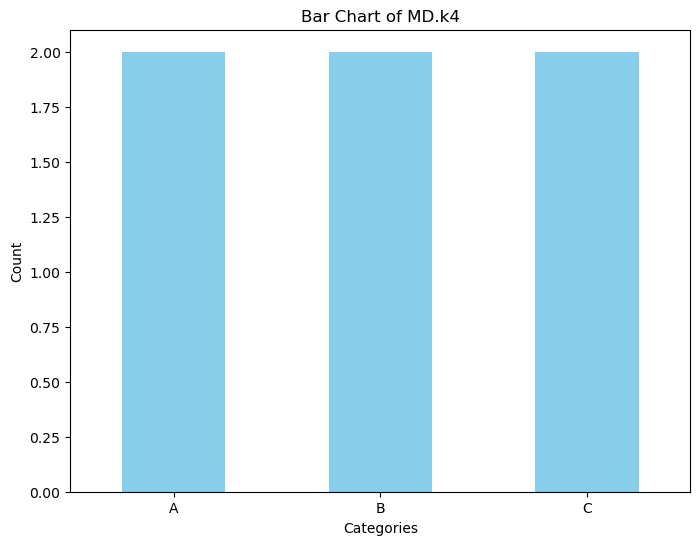

In [23]:
# Example data (replace with actual MD.k4 data)
MD_k4 = pd.Series(['A', 'B', 'A', 'C', 'B', 'C'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
MD_k4.value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of MD.k4')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


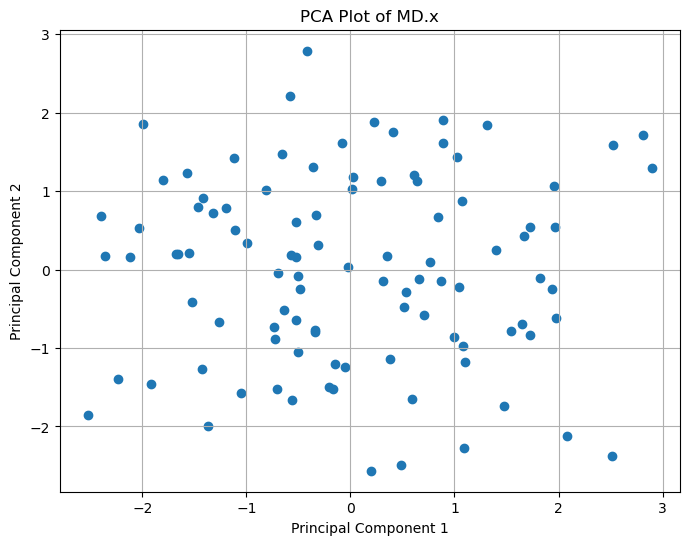

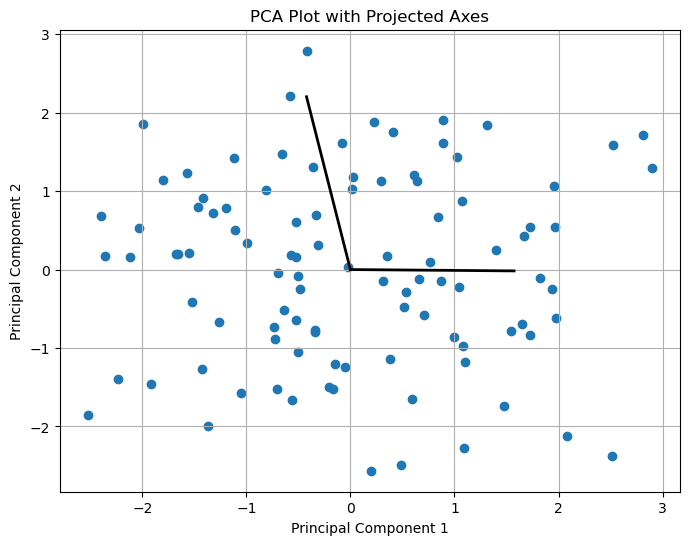

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD.x is your data matrix (already transposed if needed)
# Example data generation (replace with your actual data)
np.random.seed(0)
MD_x = np.random.rand(100, 10)  # Example data, replace with actual data

# Perform PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1])
plt.title('PCA Plot of MD.x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Project axes on PCA plot (assuming MD.pca contains PCA results)
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1])
plt.title('PCA Plot with Projected Axes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Draw projected axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=2)

plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

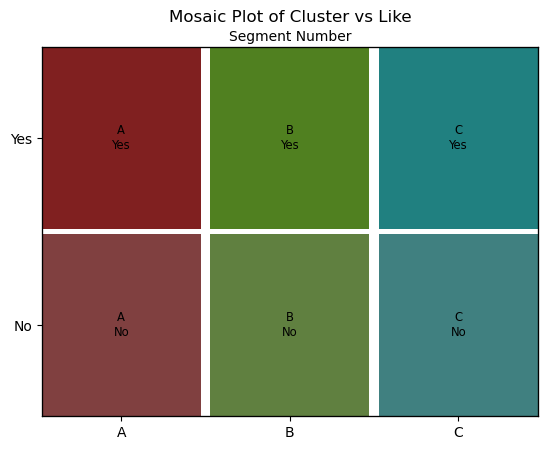

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Example data (replace with actual data)
np.random.seed(0)
MD_k4 = pd.Series(['A', 'B', 'A', 'C', 'B', 'C'])  # Example cluster data
mcdonalds_like = pd.Series(['Yes', 'No', 'No', 'Yes', 'Yes', 'No'])  # Example like data

# Step 1: Clusters (assuming MD.k4 is already defined)
k4 = MD_k4

# Step 2: Creating the table (contingency table)
table_data = pd.crosstab(k4, mcdonalds_like)

# Step 3: Mosaic plot
plt.figure(figsize=(8, 6))
mosaic(table_data.stack(), title='Mosaic Plot of Cluster vs Like', gap=0.02)
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.show()


<Figure size 800x600 with 0 Axes>

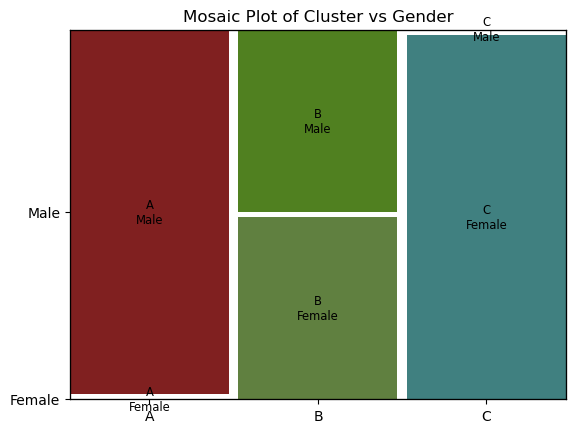

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Example data (replace with actual data)
np.random.seed(0)
k4 = pd.Series(['A', 'B', 'A', 'C', 'B', 'C'])  # Example cluster data
gender = pd.Series(['Male', 'Female', 'Male', 'Female', 'Male', 'Female'])  # Example gender data

# Step 1: Creating the contingency table
table_data = pd.crosstab(k4, gender)

# Step 2: Mosaic plot
plt.figure(figsize=(8, 6))
mosaic(table_data.stack(), title='Mosaic Plot of Cluster vs Gender', gap=0.02)
plt.show()


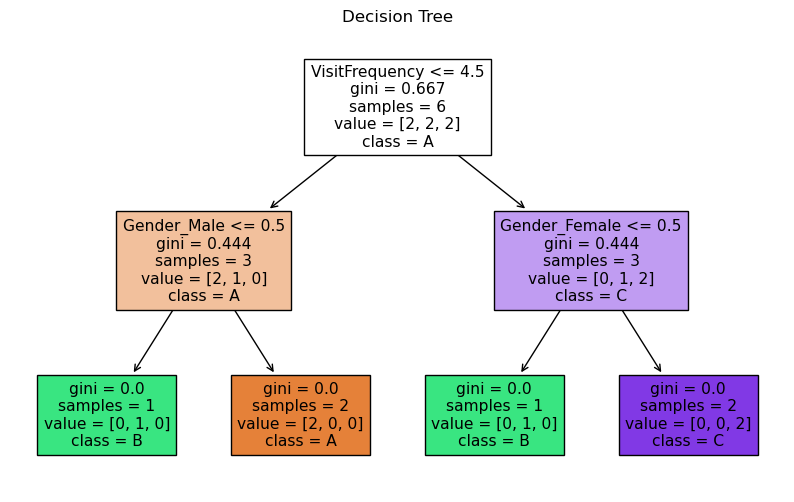

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
mcdonalds = pd.DataFrame({
    'k4': ['A', 'B', 'A', 'C', 'B', 'C'],
    'Like.n': [10, 15, 20, 25, 30, 35],
    'Age': [25, 30, 35, 40, 45, 50],
    'VisitFrequency': [2, 3, 4, 5, 6, 7],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']
})
# Convert categorical variables to dummy variables (if needed)
mcdonalds_encoded = pd.get_dummies(mcdonalds, columns=['Gender'])

# Separate features (X) and target (y)
X = mcdonalds_encoded.drop('k4', axis=1)
y = mcdonalds_encoded['k4']
# Initialize DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Fit the model
tree_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=tree_model.classes_, filled=True)
plt.title("Decision Tree")
plt.show()


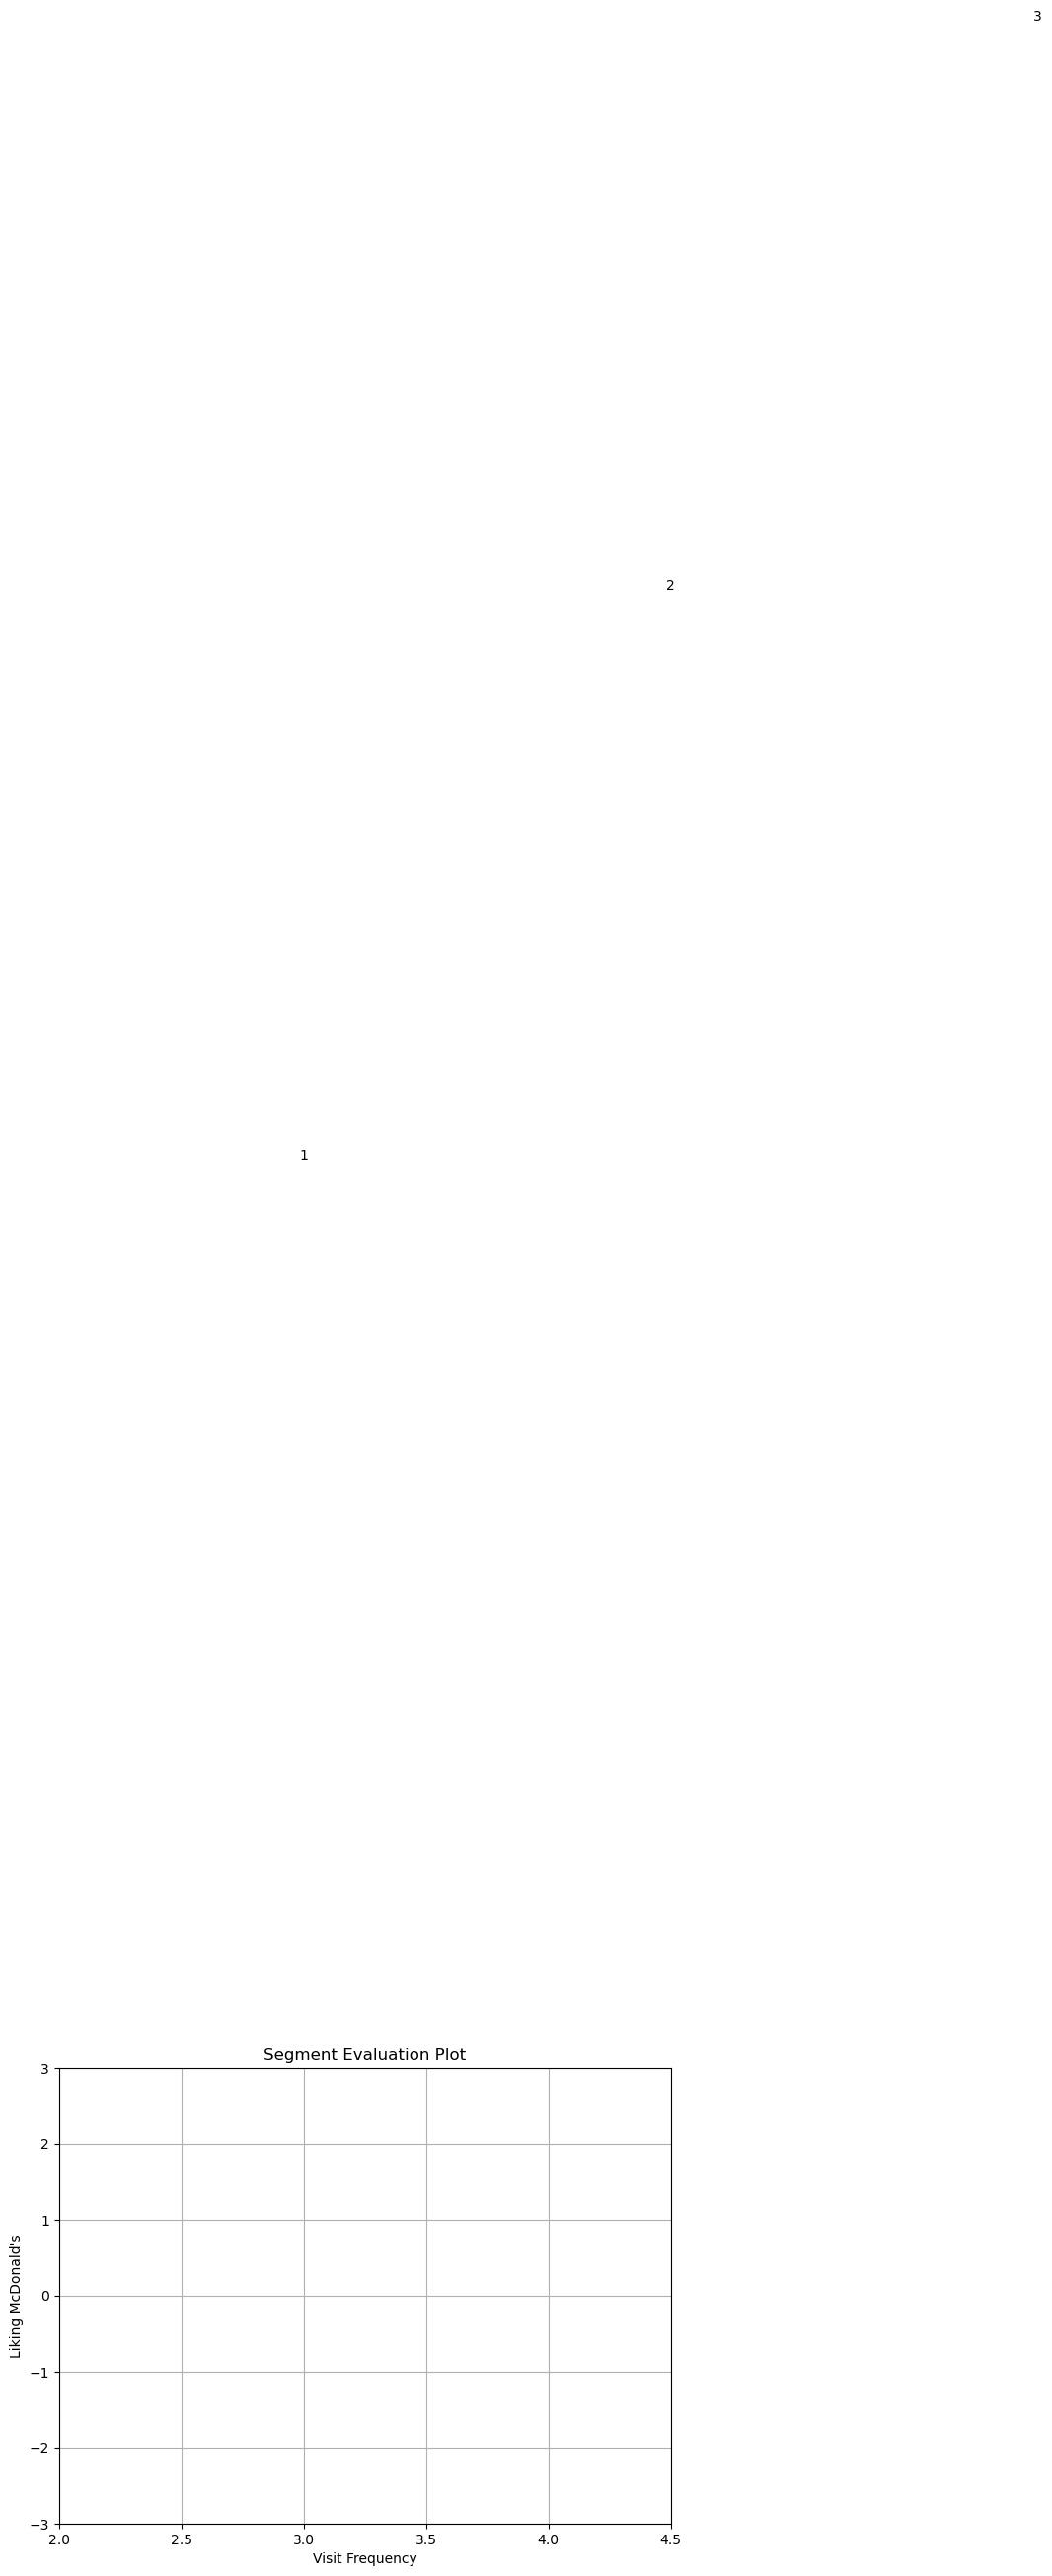

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
mcdonalds = pd.DataFrame({
    'k4': ['A', 'B', 'A', 'C', 'B', 'C'],
    'Like.n': [10, 15, 20, 25, 30, 35],
    'Age': [25, 30, 35, 40, 45, 50],
    'VisitFrequency': [2, 3, 4, 5, 6, 7],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']
})

# Calculate mean visit frequency, liking, and female percentage by segment (k4)
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())

# Create the segment evaluation plot
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=10 * female, alpha=0.7, color='b', edgecolors='k')

# Add labels and adjust limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')

# Add segment numbers as text annotations
for i, txt in enumerate(visit.index):
    plt.text(visit[i], like[i], str(i+1), ha='center', va='center')

plt.title('Segment Evaluation Plot')
plt.grid(True)
plt.show()
